In [1]:
import scipy.io as sio
import numpy as np
from copy import deepcopy
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from scipy.special import erf
from mpl_toolkits.mplot3d import Axes3D
import cmath
import matplotlib
import tfim_1d
import quspin
import fejer_kernel
import fourier_filter
import generate_cdf
from qcels import *
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['lines.markersize'] = 10

C:\Users\paulb\Documents\quantum-phase-estimation-comparision\Quantum_Version\qcels.py:171: SyntaxWarning: invalid escape sequence '\l'
  """Multi-level QCELS for a system with a large initial overlap.
C:\Users\paulb\Documents\quantum-phase-estimation-comparision\Quantum_Version\qcels.py:234: SyntaxWarning: invalid escape sequence '\l'
  """Multi-level QCELS for a system with a large initial overlap.
C:\Users\paulb\Documents\quantum-phase-estimation-comparision\Quantum_Version\qcels.py:299: SyntaxWarning: invalid escape sequence '\l'
  """Multi-level QCELS with a filtered data set for a system with a small initial overlap.
C:\Users\paulb\Documents\quantum-phase-estimation-comparision\Quantum_Version\qcels.py:481: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("error($\epsilon$)",fontsize=35)
C:\Users\paulb\Documents\quantum-phase-estimation-comparision\Quantum_Version\qcels.py:489: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("error($\epsilon$)",fontsize=35)
C:\Us

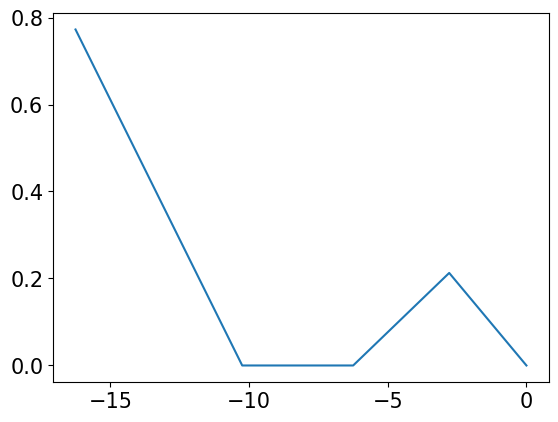

16.255760712284488


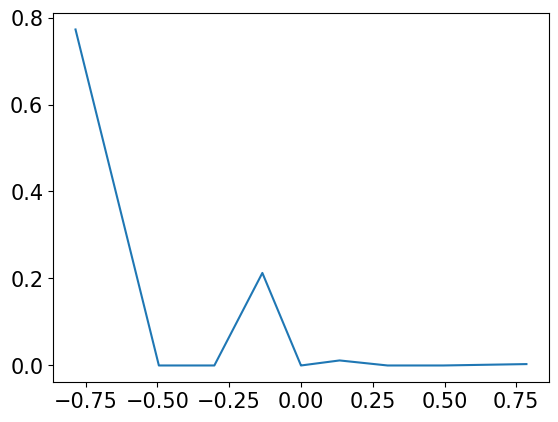

In [10]:
from scipy.linalg import norm
from scipy.linalg import expm
from numpy.linalg import eigh
from scipy.sparse.linalg import eigsh

def modify_spectrum(ham):
    arr_ham = ham.toarray()
    arr_ham = arr_ham.astype(np.complex128) 
    max_eigenvalue = np.abs(eigsh(arr_ham, k=1, which='LM')[0][0])
    print(max_eigenvalue)
    norm_ham = (np.pi/4)*arr_ham/max_eigenvalue
    # rotate matrix so that it will be positive definite
    # ham += 1/2*np.eye(2**eigen_bits)
    
    # convert revolutions to radians
    # norm_ham *= 2*np.pi*1j
    
    # convert the rotations to complex numbers
    # norm_ham = expm(norm_ham)
    return norm_ham

num_sites = 4
J = 1.0
g = 4.0

num_eigenstates_max = 100

ham0 = tfim_1d.generate_ham(num_sites, J, 1.0)
ground_state_0 = ham0.eigsh(k=1,which="SA")[1][:,0]

# plot original spectrum
ham = tfim_1d.generate_ham(num_sites, J, g)
if( num_eigenstates_max > ham.shape[0] // 2):
    eigenenergies, eigenstates = ham.eigsh(k=ham.shape[0] // 2, which='SA')
else:
    eigenenergies, eigenstates = ham.eigsh(k=num_eigenstates_max,which="SA")
ground_state = eigenstates[:,0]
population_raw = np.abs(np.dot(eigenstates.conj().T, ground_state_0))**2
plt.plot(eigenenergies,population_raw);plt.show()

# create modified spectrum
ham = modify_spectrum(ham)
if( num_eigenstates_max > ham.shape[0] // 2):
    eigenenergies, eigenstates = eigh(ham)
else:
    eigenenergies, eigenstates = eigh(ham)
ground_state = eigenstates[:,0]
population = np.abs(np.dot(eigenstates.conj().T, ground_state_0))**2
plt.plot(eigenenergies,population);plt.show()

# population_raw = np.abs(np.dot(eigenstates.conj().T, ground_state_0))**2

# plt.plot(eigenenergies,population_raw,'b-o');plt.show()

# spectrum, population = generate_spectrum_population(eigenenergies, population_raw, 
#                                                     [population_raw[0]])
# plt.plot(spectrum, population,'b-o');plt.show()


In [3]:
# p0_array = np.array([0.6,0.8]) #initial overlap with the first eigenvector
# T0 = 100
# N_test_QCELS = 10  #number of different circuit depths for QCELS test
# N_QPE = 10  #number of different circuit depths for QCELS QPE test
# T_list_QCELS = 10+T0/2*(np.arange(N_test_QCELS))### circuit depth for QCELS
# T_list_QPE = 10+T0*4*(np.arange(N_QPE))###circuit depth for QPE
# err_QCELS=np.zeros((len(p0_array),len(T_list_QCELS)))
# err_QPE=np.zeros((len(p0_array),len(T_list_QPE)))
# cost_list_avg_QCELS = np.zeros((len(p0_array),len(T_list_QCELS)))
# cost_list_avg_QPE = np.zeros((len(p0_array),len(T_list_QPE)))
# rate_success_QCELS=np.zeros((len(p0_array),len(T_list_QCELS)))
# rate_success_QPE=np.zeros((len(p0_array),len(T_list_QPE)))
# max_T_QCELS=np.zeros((len(p0_array),len(T_list_QCELS)))
# Navg = 10 #number of trying
# err_thres_hold=0.01
# err_thres_hold_QPE=0.01
# #-----------------------------    
# for a1 in range(len(p0_array)):
#     p0=p0_array[a1]
#     n_success_QCELS= np.zeros(len(T_list_QCELS))
#     n_success_QPE= np.zeros(len(T_list_QPE))
#     for n_test in range(Navg):
#         print("For p0=",p0,"For N_test=",n_test+1)
#         spectrum, population = generate_spectrum_population(eigenenergies, 
#                 population_raw, [p0])
#         #------------------QCELS-----------------
#         Nsample=100 #number of samples for constructing the loss function
#         for ix in range(len(T_list_QCELS)):
#             T = T_list_QCELS[ix]
#             NT = 5
#             lambda_prior = spectrum[0]
#             ground_energy_estimate_QCELS, cost_list_QCELS_this, max_T_QCELS_this = \
#                     qcels_largeoverlap(spectrum, population, T, NT,
#                             Nsample, lambda_prior)#QCELS with time T
#             err_this_run_QCELS = np.abs(ground_energy_estimate_QCELS.x[2] - spectrum[0])
#             err_QCELS[a1,ix] = err_QCELS[a1,ix]+np.abs(err_this_run_QCELS)
#             cost_list_avg_QCELS[a1,ix]=cost_list_avg_QCELS[a1,ix]+cost_list_QCELS_this
#             max_T_QCELS[a1,ix]=max(max_T_QCELS[a1,ix],max_T_QCELS_this)
#             if np.abs(err_this_run_QCELS)<err_thres_hold:
#                 n_success_QCELS[ix]+=1

#        # ----------------- QPE -----------------------
#         N_try_QPE=int(15*np.ceil(1.0/p0)) #number of QPE samples each time
#         for ix in range(len(T_list_QPE)):
#             T = int(T_list_QPE[ix])
#             discrete_energies = 2*np.pi*np.arange(2*T)/(2*T) - np.pi 
#             dist = generate_QPE_distribution(spectrum,population,2*T) #Generate QPE samples
#             samp = generate_cdf.draw_with_prob(dist,N_try_QPE)
#             j_min = samp.min()
#             ground_energy_estimate_QPE = discrete_energies[j_min]
#             err_this_run_QPE = np.abs(ground_energy_estimate_QPE-spectrum[0])
#             err_QPE[a1,ix] = err_QPE[a1,ix]+np.abs(err_this_run_QPE)
#             if np.abs(err_this_run_QPE)<err_thres_hold_QPE:
#                 n_success_QPE[ix]+=1
#             cost_list_avg_QPE[a1,ix] = T*N_try_QPE
#     rate_success_QCELS[a1,:] = n_success_QCELS[:]/Navg
#     rate_success_QPE[a1,:] = n_success_QPE[:]/Navg
#     err_QCELS[a1,:] = err_QCELS[a1,:]/Navg
#     err_QPE[a1,:] = err_QPE[a1,:]/Navg
#     cost_list_avg_QCELS[a1,:]=cost_list_avg_QCELS[a1,:]/Navg


In [6]:
p0_array            = np.array([0.6,0.8]) # initial overlap with the first eigenvector
T0                  = 100
N_test_QCELS        = 5 # number of different circuit depths for QCELS test
N_QPE               = 5 # number of different circuit depths for QCELS QPE test
T_list_QCELS        = 10+T0/2*(np.arange(N_test_QCELS)) # circuit depth for QCELS
T_list_QPE          = 10+T0*4*(np.arange(N_QPE)) # circuit depth for QPE
err_QCELS           = np.zeros((len(p0_array),len(T_list_QCELS)))
err_QPE             = np.zeros((len(p0_array),len(T_list_QPE)))
cost_list_avg_QCELS = np.zeros((len(p0_array),len(T_list_QCELS)))
cost_list_avg_QPE   = np.zeros((len(p0_array),len(T_list_QPE)))
rate_success_QCELS  = np.zeros((len(p0_array),len(T_list_QCELS)))
rate_success_QPE    = np.zeros((len(p0_array),len(T_list_QPE)))
max_T_QCELS         = np.zeros((len(p0_array),len(T_list_QCELS)))
Navg                = 1 # number of trials
err_thres_hold      = 0.01
err_thres_hold_QPE  = 0.01
#-----------------------------    
for a1 in range(len(p0_array)):
    p0=p0_array[a1]
    n_success_QCELS= np.zeros(len(T_list_QCELS))
    n_success_QPE= np.zeros(len(T_list_QPE))
    for n_test in range(Navg):
        print("For p0=",p0,"For N_test=",n_test+1)
        spectrum, population = generate_spectrum_population(eigenenergies, 
                population_raw, [p0])
        #------------------QCELS-----------------
        Nsample=100 #number of samples for constructing the loss function
        for ix in range(len(T_list_QCELS)):
            T = T_list_QCELS[ix]
            NT = 5
            lambda_prior = spectrum[0]
            ground_energy_estimate_QCELS, cost_list_QCELS_this, max_T_QCELS_this = \
                    qcels_largeoverlap_ham(ham, T, NT, Nsample, lambda_prior)
            err_this_run_QCELS = np.abs(ground_energy_estimate_QCELS.x[2] - lambda_prior)
            err_QCELS[a1,ix] = err_QCELS[a1,ix]+np.abs(err_this_run_QCELS)
            cost_list_avg_QCELS[a1,ix]=cost_list_avg_QCELS[a1,ix]+cost_list_QCELS_this
            max_T_QCELS[a1,ix]=max(max_T_QCELS[a1,ix],max_T_QCELS_this)
            if np.abs(err_this_run_QCELS)<err_thres_hold:
                n_success_QCELS[ix]+=1

       # ----------------- QPE -----------------------
        N_try_QPE=int(15*np.ceil(1.0/p0)) #number of QPE samples each time
        for ix in range(len(T_list_QPE)):
            T = int(T_list_QPE[ix])
            discrete_energies = 2*np.pi*np.arange(2*T)/(2*T) - np.pi 
            dist = generate_QPE_distribution(spectrum,population,2*T) #Generate QPE samples
            samp = generate_cdf.draw_with_prob(dist,N_try_QPE)
            j_min = samp.min()
            ground_energy_estimate_QPE = discrete_energies[j_min]
            err_this_run_QPE = np.abs(ground_energy_estimate_QPE-spectrum[0])
            err_QPE[a1,ix] = err_QPE[a1,ix]+np.abs(err_this_run_QPE)
            if np.abs(err_this_run_QPE)<err_thres_hold_QPE:
                n_success_QPE[ix]+=1
            cost_list_avg_QPE[a1,ix] = T*N_try_QPE
    rate_success_QCELS[a1,:] = n_success_QCELS[:]/Navg
    rate_success_QPE[a1,:] = n_success_QPE[:]/Navg
    err_QCELS[a1,:] = err_QCELS[a1,:]/Navg
    err_QPE[a1,:] = err_QPE[a1,:]/Navg
    cost_list_avg_QCELS[a1,:]=cost_list_avg_QCELS[a1,:]/Navg


For p0= 0.6 For N_test= 1
ts [0. 1. 2. 3. 4.] Z_est [ 1.  +0.02j  0.18+0.94j -1.  +0.34j -0.64-0.78j  0.54-0.86j] x0 [ 0.5         0.         -0.78539816]
ts [0.  1.5 3.  4.5 6. ] Z_est [ 1.  -0.06j  0.28-0.96j -0.54-0.88j -0.98+0.36j -0.1 +0.96j] x0 [ 0.5         0.         -0.78539816]
ts [0.    1.375 2.75  4.125 5.5  ] Z_est [ 1.  +0.04j  0.82-0.38j  0.44-0.88j  0.04-0.98j -0.3 -0.9j ] x0 [ 0.5         0.         -0.78539816]
ts [0. 1. 2. 3. 4.] Z_est [ 1.  -0.02j  0.24+0.96j -0.94+0.3j  -0.62-0.88j  0.5 -0.72j] x0 [ 0.5         0.         -0.78539816]
ts [0.     1.3125 2.625  3.9375 5.25  ] Z_est [1.  -0.16j 0.98-0.2j  0.92-0.42j 0.72-0.52j 0.78-0.64j] x0 [ 0.5         0.         -0.78539816]
For p0= 0.8 For N_test= 1
ts [0. 1. 2. 3. 4.] Z_est [ 1.  -0.04j  0.2 +0.98j -0.9 +0.42j -0.66-0.74j  0.66-0.78j] x0 [ 0.5         0.         -0.78539816]
ts [0.  1.5 3.  4.5 6. ] Z_est [ 1.  +0.14j  0.52-0.82j -0.5 -0.78j -0.94+0.08j -0.12+0.94j] x0 [ 0.5         0.         -0.78539816]
ts [0

In [7]:
np.savez('Data/result_TFIM_8sites_QPE',name1=rate_success_QPE,name2=T_list_QPE,name3=cost_list_avg_QPE,name4=err_QPE)
np.savez('Data/result_TFIM_8sites_QCELS',name1=rate_success_QCELS,name2=max_T_QCELS,name3=cost_list_avg_QCELS,name4=err_QCELS)
np.savez('Data/TFIM_8sites_data',name1=spectrum,name2=population,name3=ground_energy_estimate_QCELS.x[0],
        name4=ground_energy_estimate_QCELS.x[1],name5=ground_energy_estimate_QCELS.x[2])